In [ ]:
from random import sample
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

# Create Sudoku puzzle
puzzle = np.asarray(
    [
        [0, 4, 3, 0, 8, 0, 2, 5, 0],
        [6, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 9, 4],
        [9, 0, 0, 0, 0, 4, 0, 7, 0],
        [0, 0, 0, 6, 0, 8, 0, 0, 0],
        [0, 1, 0, 2, 0, 0, 0, 0, 3],
        [8, 2, 0, 5, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 5],
        [0, 3, 4, 0, 9, 0, 7, 1, 0],
    ]
)

# create 3x3 squares for each number 1-9
n = 3
G = nx.sudoku_graph(n)
mapping = dict(zip(G.nodes(), puzzle.flatten()))
    
pos = dict(zip(list(G.nodes()), nx.grid_2d_graph(n * n, n * n)))

# map the nodes 1-9 to a colormap
low, *_, high = sorted(mapping.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Pastel1)

# draw the graph
plt.figure(figsize=(12, 12))
nx.draw(
    G,
    labels=mapping,
    pos=pos,
    with_labels=True,
    node_color=[mapper.to_rgba(i) for i in mapping.values()],
    width=1,
    node_size=1000,
)
plt.show()

# Generate random sudoku
def generate_random_sudoku(n):
    side = n * n

    def _pattern(r, c):
        return (n * (r % n) + r // n + c) % side

    rBase = range(n)
    rows = [g * n + r for g in sample(rBase, n) for r in sample(rBase, n)]
    cols = [g * n + c for g in sample(rBase, n) for c in sample(rBase, n)]
    nums = sample(range(1, n * n + 1), n * n)
    board = [nums[_pattern(r, c)] for r in rows for c in cols]
    return board

G = nx.sudoku_graph(n=3)
board = generate_random_sudoku(n=3)
mapping = dict(zip(G.nodes(), board))

plt.figure(1, figsize=(12, 12))
nx.draw(
    G,
    pos=pos,
    labels=mapping,
    node_size=1000,
    node_color=[mapper.to_rgba(i) for i in mapping.values()],
    with_labels=True,
)

plt.show()

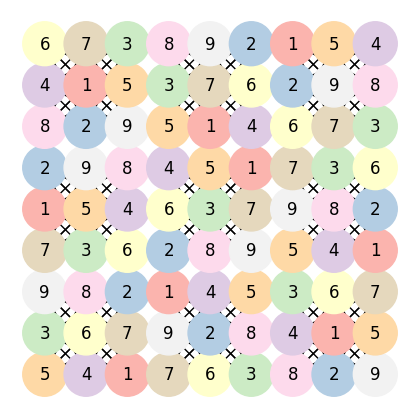

In [16]:
from random import sample
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
# Generate random sudoku
def generate_random_sudoku(n):
    side = n * n

    def _pattern(r, c):
        return (n * (r % n) + r // n + c) % side

    rBase = range(n)
    rows = [g * n + r for g in sample(rBase, n) for r in sample(rBase, n)]
    cols = [g * n + c for g in sample(rBase, n) for c in sample(rBase, n)]
    nums = sample(range(1, n * n + 1), n * n)
    board = [nums[_pattern(r, c)] for r in rows for c in cols]
    return board

n = 3
G = nx.sudoku_graph(n)
board = generate_random_sudoku(n)
mapping = dict(zip(G.nodes(), board))
pos = dict(zip(list(G.nodes()), nx.grid_2d_graph(n * n, n * n)))
# map the nodes 1-9 to a colormap
low, *_, high = sorted(mapping.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Pastel1)
plt.figure(1, figsize=(4, 4))
nx.draw(
    G,
    pos=pos,
    labels=mapping,
    node_size=1000,
    node_color=[mapper.to_rgba(i) for i in mapping.values()],
    with_labels=True,
)

plt.show()


Puzzle:


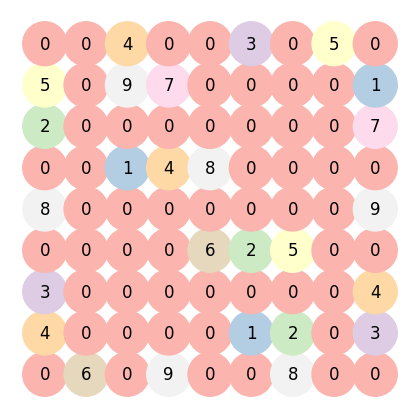


Solution:


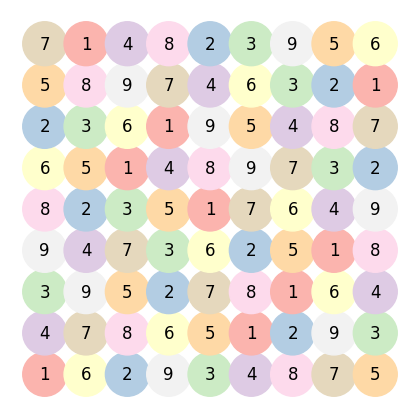

In [33]:
import networkx as nx
from itertools import product
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy

def sudoku_solve(puzzle):
    """
    Solves a Sudoku puzzle using NetworkX graph coloring.

    :param puzzle:  9x9 list of lists representing the Sudoku puzzle. 
                    Empty cells are denoted by 0.
    :return: Solved 9x9 Sudoku puzzle as a list of lists.
    """
    n = 3  # For standard Sudoku
    N = n * n
    size = N * N

    # create mapping: (row, col) to node number 
    def rc_to_node(r, c):
        return r * N + c

    # create mapping: node number to (row, col) 
    def node_to_rc(node):
        return divmod(node, N)

    # initialize graph
    G = nx.Graph()

    # Add all nodes
    G.add_nodes_from(range(size))

    # Add edges for rows, columns, and blocks
    for r in range(N):
        for c in range(N):
            node = rc_to_node(r, c)
            # Row and column neighbors
            for k in range(N):
                if k != c:
                    G.add_edge(node, rc_to_node(r, k))
                if k != r:
                    G.add_edge(node, rc_to_node(k, c))
            # Block neighbors
            br, bc = r // n, c // n
            for dr in range(n):
                for dc in range(n):
                    nr, nc = br * n + dr, bc * n + dc
                    neighbor = rc_to_node(nr, nc)
                    if neighbor != node:
                        G.add_edge(node, neighbor)

    # Pre-assign colors based on the puzzle
    colors = {}
    for r in range(N):
        for c in range(N):
            value = puzzle[r][c]
            if value != 0:
                node = rc_to_node(r, c)
                colors[node] = value

    # Backtracking solver
    def backtrack(assign, nodes):
        if not nodes:
            return assign

        # Select the node with the fewest possible colors (MRV heuristic)
        node = min(nodes, key=lambda x: len(possible_colors(x, assign)))
        for color in possible_colors(node, assign):
            # Check if color is valid
            if all(assign.get(neigh) != color for neigh in G.neighbors(node)):
                assign[node] = color
                result = backtrack(assign, [n for n in nodes if n != node])
                if result:
                    return result
                del assign[node]
        return None

    def possible_colors(node, assign):
        if node in assign:
            return [assign[node]]
        used = {assign.get(neighbor) for neighbor in G.neighbors(node) if neighbor in assign}
        return [c for c in range(1, N + 1) if c not in used]

    # Start backtracking with the pre-assigned colors
    solution = backtrack(copy.deepcopy(colors), list(range(size)))

    if solution is None:
        raise ValueError("No solution exists for the given Sudoku puzzle.")

    # Convert solution back to 9x9 grid
    solved_puzzle = [[0 for _ in range(N)] for _ in range(N)]
    for node, color in solution.items():
        r, c = node_to_rc(node)
        solved_puzzle[r][c] = color

    return solved_puzzle

def visualize_graph(puzzle):
    n = 3
    G = nx.sudoku_graph(n)
    puzzle = np.asarray(puzzle)
    mapping = dict(zip(G.nodes(), puzzle.flatten()))
        
    pos = dict(zip(list(G.nodes()), nx.grid_2d_graph(n * n, n * n)))

    # map the nodes 1-9 to a colormap
    low, *_, high = sorted(mapping.values())
    norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
    mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Pastel1)

    # draw the graph
    plt.figure(figsize=(4,4))
    nx.draw(
        G,
        labels=mapping,
        pos=pos,
        with_labels=True,
        node_color=[mapper.to_rgba(i) for i in mapping.values()],
        width=0,
        node_size=1000,
    )
    plt.show()
    

# Example usage
if __name__ == "__main__":
    puzzle = [
        [0,4,3,0,8,0,2,5,0],
        [6,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,1,0,9,4],
        [9,0,0,0,0,4,0,7,0],
        [0,0,0,6,0,8,0,0,0],
        [0,1,0,2,0,0,0,0,3],
        [8,2,0,5,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,5],
        [0,3,4,0,9,0,7,1,0]
    ]
    print("\nPuzzle:")
    visualize_graph(puzzle)
    
    print("\nSolution:")
    solved = sudoku_solve(puzzle)
    visualize_graph(solved)

In [32]:
import networkx as nx
import copy
def sudoku_solver(puzzle):
    """
    Solves a Sudoku puzzle using NetworkX graph coloring.

    :param puzzle:  9x9 list of lists representing the Sudoku puzzle. 
                    Empty cells are denoted by 0.
    :return: Solved 9x9 Sudoku puzzle as a list of lists.
    """
    n = 3  # For standard Sudoku
    N = n * n
    size = N * N

    # create mapping: (row, col) to node number 
    def rc_to_node(r, c):
        return r * N + c

    # create mapping: node number to (row, col) 
    def node_to_rc(node):
        return divmod(node, N)

    # initialize graph
    G = nx.Graph()

    # add nodes
    G.add_nodes_from(range(size))

    # Add edges for rows, columns, and blocks
    for r in range(N):
        for c in range(N):
            node = rc_to_node(r, c)
            # Row and column neighbors
            for k in range(N):
                if k != c:
                    G.add_edge(node, rc_to_node(r, k))
                if k != r:
                    G.add_edge(node, rc_to_node(k, c))
            # Block neighbors
            br = r // n
            bc = c // n
            for dr in range(n):
                for dc in range(n):
                    nr, nc = br * n + dr, bc * n + dc
                    neighbor = rc_to_node(nr, nc)
                    if neighbor != node:
                        G.add_edge(node, neighbor)

    # Pre-assign colors based on the puzzle
    colors = {}
    for r in range(N):
        for c in range(N):
            value = puzzle[r][c]
            if value != 0:
                node = rc_to_node(r, c)
                colors[node] = value

    # solver to complete the coloring
    def backtrack(assign, nodes):
        if not nodes:
            return assign

        # minimum remaining value heuristic: select a node with the fewest possible colors 
        node = min(nodes, key=lambda x: len(possible_colors(x, assign)))
        for color in possible_colors(node, assign):
            # check if color is valid and recurse 
            if all(assign.get(neighbor) != color for neighbor in G.neighbors(node)):
                assign[node] = color
                result = backtrack(assign, [n for n in nodes if n != node])
                if result:
                    return result
                del assign[node]
        return None

    def possible_colors(node, assign):
        if node in assign:
            return [assign[node]]
        used = {assign.get(neighbor) for neighbor in G.neighbors(node) if neighbor in assign}
        return [c for c in range(1, N + 1) if c not in used]

    # solve using a backtrack algorithm 
    solution = backtrack(copy.deepcopy(colors), list(range(size)))

    if solution is None:
        raise ValueError("No solution exists for the given Sudoku puzzle.")

    # create an empty solved puzzle and populate solution items in matrix
    solved_puzzle = [[0 for _ in range(N)] for _ in range(N)]
    for node, color in solution.items():
        r, c = node_to_rc(node)
        solved_puzzle[r][c] = color

    return solved_puzzle

if __name__ == "__main__":
    
    puzzle = [
    [0, 7, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 6, 0, 0, 0],
    [8, 0, 0, 0, 0, 0, 0, 0, 3],
    [0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 6, 0, 0, 0, 0, 0],
    [0, 3, 0, 0, 0, 0, 0, 4, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 7],
    [0, 0, 0, 0, 2, 0, 4, 0, 0],
    [5, 0, 1, 0, 0, 0, 0, 0, 0]
    ]
    
    print("\nPuzzle:")
    for row in puzzle:
        print(row)
    
    print("\nSolution:")
    solved = sudoku_solver(puzzle)
    for row in solved:
        print(row)


Puzzle:
[0, 7, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 6, 0, 0, 0]
[8, 0, 0, 0, 0, 0, 0, 0, 3]
[0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 6, 0, 0, 0, 0, 0]
[0, 3, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 7]
[0, 0, 0, 0, 2, 0, 4, 0, 0]
[5, 0, 1, 0, 0, 0, 0, 0, 0]

Solution:
[4, 7, 6, 3, 5, 8, 2, 9, 1]
[1, 2, 3, 7, 9, 6, 5, 8, 4]
[8, 5, 9, 2, 1, 4, 6, 7, 3]
[6, 4, 5, 8, 3, 1, 7, 2, 9]
[7, 1, 2, 6, 4, 9, 8, 3, 5]
[9, 3, 8, 5, 7, 2, 1, 4, 6]
[2, 8, 4, 1, 6, 3, 9, 5, 7]
[3, 6, 7, 9, 2, 5, 4, 1, 8]
[5, 9, 1, 4, 8, 7, 3, 6, 2]
